In [28]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import sklearn
from sklearn import metrics
from sklearn.neighbors import KNeighborsRegressor
from scipy.cluster.vq import kmeans, vq, whiten
from scipy.spatial.distance import cdist
from datetime import datetime

In [3]:
df = pd.read_csv('./meter_data/Office_Amelia.csv', index_col = "timestamp", parse_dates=True) 
df.head()

Office_Amelia
timestamp                         
2015-01-01 00:00:00           3.96
2015-01-01 01:00:00           4.44
2015-01-01 02:00:00           4.82
2015-01-01 03:00:00           4.28
2015-01-01 04:00:00          18.79

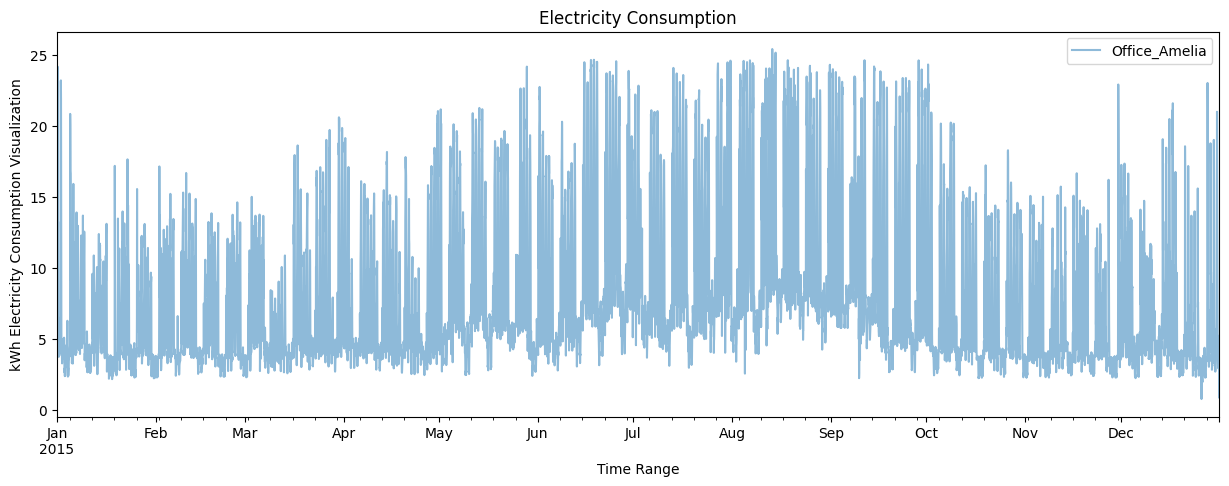

In [4]:
df.plot(alpha=0.5, figsize=(15, 5))
plt.title("Electricity Consumption")
plt.xlabel("Time Range")
plt.ylabel("kWh Electricity Consumption Visualization");

In [5]:
df.index[0]

Timestamp('2015-01-01 00:00:00')

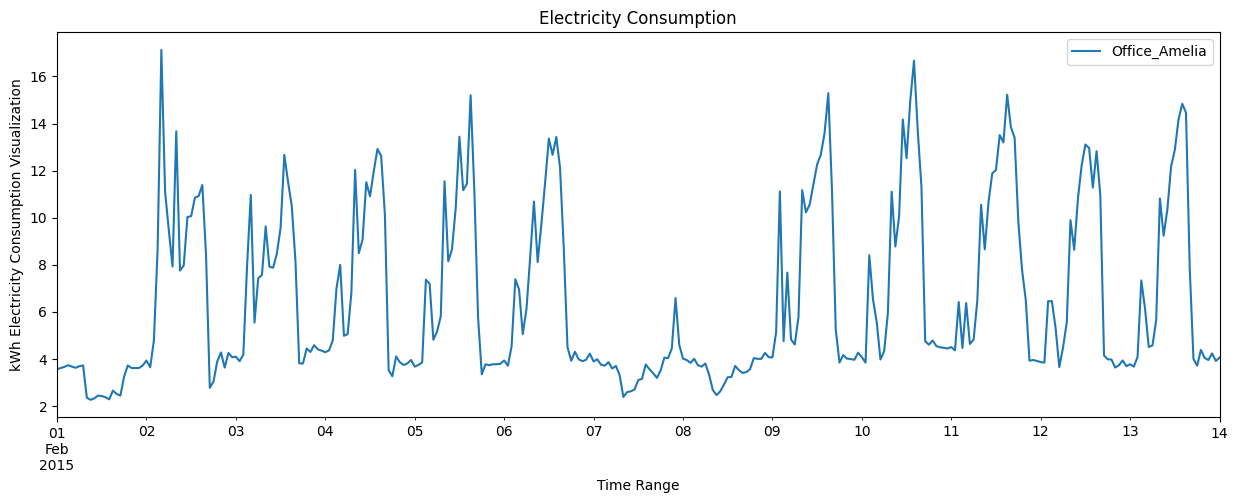

In [6]:
df.truncate(before='2015-02-01', after='2015-02-14').plot(figsize=(15,5))
plt.title("Electricity Consumption")
plt.xlabel("Time Range")
plt.ylabel("kWh Electricity Consumption Visualization");

### Daily Profile Analysis - Weekday vs. Weekend¶

In [7]:
df['Date'] = df.index.map(lambda t: t.date())
df['Time'] = df.index.map(lambda t: t.time())

In [8]:
df.head()

Office_Amelia        Date      Time
timestamp                                               
2015-01-01 00:00:00           3.96  2015-01-01  00:00:00
2015-01-01 01:00:00           4.44  2015-01-01  01:00:00
2015-01-01 02:00:00           4.82  2015-01-01  02:00:00
2015-01-01 03:00:00           4.28  2015-01-01  03:00:00
2015-01-01 04:00:00          18.79  2015-01-01  04:00:00

In [9]:
df_pivot = pd.pivot_table(df, values='Office_Amelia', index='Date', columns='Time')
df_pivot.head()

Time        00:00:00  01:00:00  02:00:00  03:00:00  04:00:00  05:00:00  \
Date                                                                     
2015-01-01      3.96      4.44      4.82      4.28     18.79     24.16   
2015-01-02      4.55      4.79      4.03      4.71     19.15     23.07   
2015-01-03      4.46      4.20      4.14      4.70      4.49      4.20   
2015-01-04      4.50      4.47      3.95      4.61      4.48      4.34   
2015-01-05      4.06      3.93      4.08      4.66     20.83     20.00   

Time        06:00:00  07:00:00  08:00:00  09:00:00  ...  14:00:00  15:00:00  \
Date                                                ...                       
2015-01-01     22.65     17.08     12.46     13.24  ...      3.72      4.82   
2015-01-02     23.19     21.89     16.67      9.60  ...      3.76      3.26   
2015-01-03      5.07      4.88      3.71      2.93  ...      2.38      2.51   
2015-01-04      5.15      6.26      3.69      2.97  ...      2.40      2.39   
2015-01-05     16.80     16.64     15.47     11.35  ...     11.34     11.08   

Time        16:00:00  17:00:00  18:00:00  19:00:00  20:00:00  21:00:00  \
Date                                                                     
2015-01-01      6.15      5.47      4.97      5.93      6.46      4.67   
2015-01-02      3.83      4.47      3.81      3.58      3.79      4.09   
2015-01-03      2.72      3.06      4.03      3.78      3.80      4.17   
2015-01-04      2.60      2.90      3.47      3.50      4.24      4.01   
2015-01-05      8.79      3.27      3.78      3.56      3.84      4.00   

Time        22:00:00  23:00:00  
Date                            
2015-01-01      4.50      3.98  
2015-01-02      4.22      4.22  
2015-01-03      4.22      4.35  
2015-01-04      3.99      3.73  
2015-01-05      3.79      3.73  

[5 rows x 24 columns]

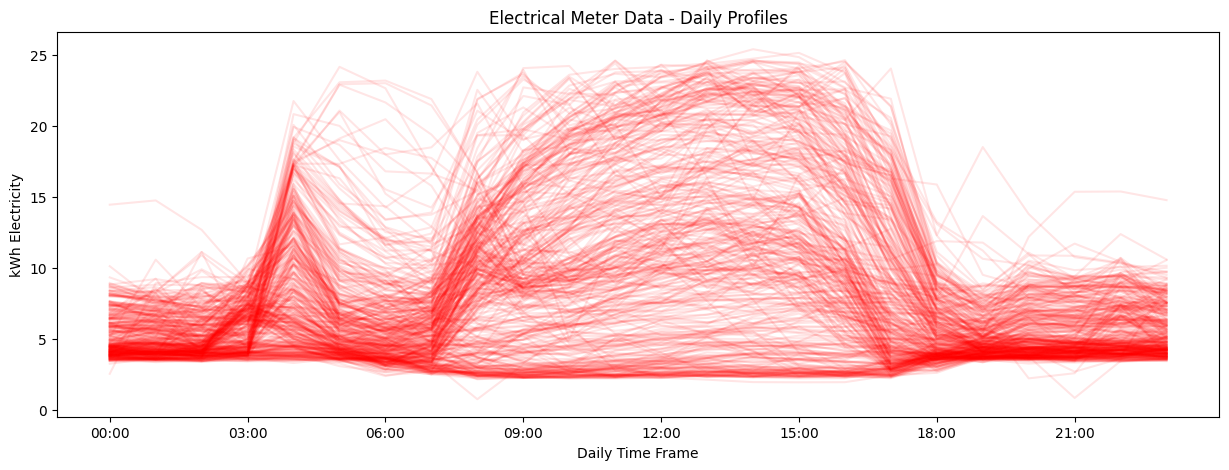

In [10]:
df_pivot.T.plot(legend=False, figsize=(15,5), color='r', alpha=0.1, xticks=np.arange(0, 86400, 10800))
plt.title("Electrical Meter Data - Daily Profiles")
plt.xlabel("Daily Time Frame")
plt.ylabel("kWh Electricity");

### Let's look at weekdays first:

In [11]:
test = df.index[0].date()
test.weekday()

3

In [12]:
df['Weekday'] = df.index.map(lambda t: t.date().weekday())

In [13]:
df.head()

Office_Amelia        Date      Time  Weekday
timestamp                                                        
2015-01-01 00:00:00           3.96  2015-01-01  00:00:00        3
2015-01-01 01:00:00           4.44  2015-01-01  01:00:00        3
2015-01-01 02:00:00           4.82  2015-01-01  02:00:00        3
2015-01-01 03:00:00           4.28  2015-01-01  03:00:00        3
2015-01-01 04:00:00          18.79  2015-01-01  04:00:00        3

In [14]:
df_pivot_weekday = pd.pivot_table(df[(df.Weekday < 5)], values='Office_Amelia', index='Date', columns='Time')

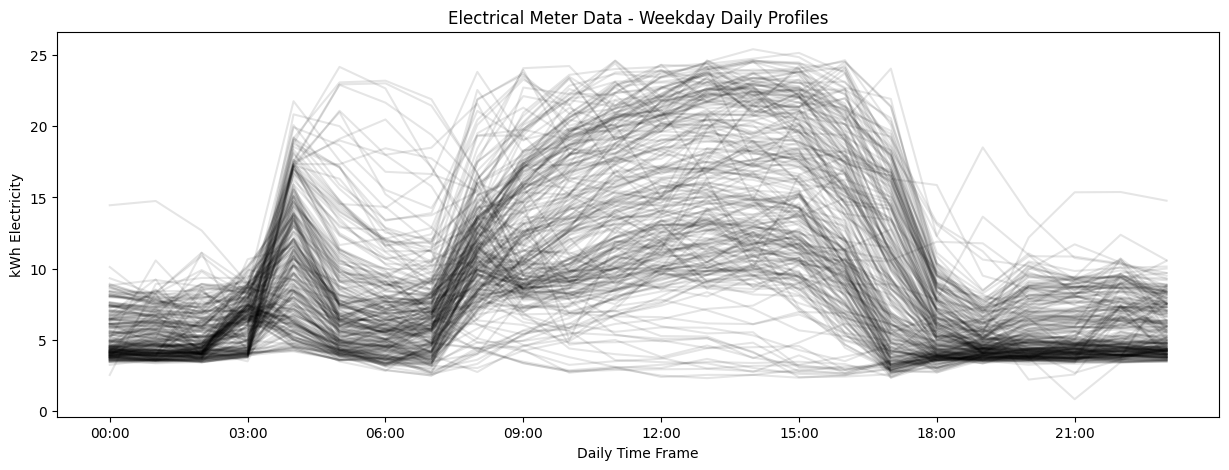

In [15]:
df_pivot_weekday.T.plot(legend=False, figsize=(15,5), color='k', alpha=0.1, xticks=np.arange(0, 86400, 10800))
plt.title("Electrical Meter Data - Weekday Daily Profiles")
plt.xlabel("Daily Time Frame")
plt.ylabel("kWh Electricity");

###  Manual indentification of clusters
There is varying levels of consumption throughout the course of a year. This is probably because of weather effects or schedule changes.

These could be considered "clusters" of behavior due to the course of

Let's try weekend:

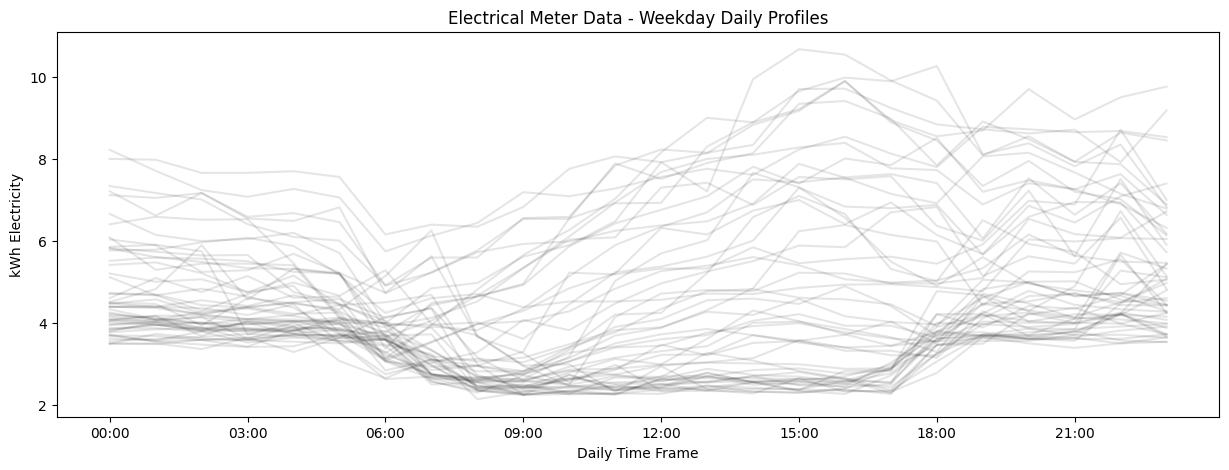

In [16]:
df_pivot_weekend = pd.pivot_table(df[(df.Weekday > 5)], values='Office_Amelia', index='Date', columns='Time')
df_pivot_weekend.T.plot(legend=False, figsize=(15,5), color='k', alpha=0.1, xticks=np.arange(0, 86400, 10800))
plt.title("Electrical Meter Data - Weekday Daily Profiles")
plt.xlabel("Daily Time Frame")
plt.ylabel("kWh Electricity");

### K-means clustering - daily load profile

In [17]:
df = pd.read_csv('./meter_data/Office_Amelia.csv', index_col = "timestamp", parse_dates=True) 
df.head()

Office_Amelia
timestamp                         
2015-01-01 00:00:00           3.96
2015-01-01 01:00:00           4.44
2015-01-01 02:00:00           4.82
2015-01-01 03:00:00           4.28
2015-01-01 04:00:00          18.79

In [18]:
df_norm = (df - df.mean()) / (df.max() - df.min()) 

df['Time'] = df.index.map(lambda t: t.time())
df['Date'] = df.index.map(lambda t: t.date())
df_norm['Time'] = df_norm.index.map(lambda t: t.time())
df_norm['Date'] = df_norm.index.map(lambda t: t.date())

In [19]:
dailyblocks = pd.pivot_table(df, values='Office_Amelia', index='Date', columns='Time', aggfunc='mean')
dailyblocks_norm = pd.pivot_table(df_norm, values='Office_Amelia', index='Date', columns='Time', aggfunc='mean')

### Clustering Model


In [20]:
dailyblocksmatrix_norm = np.matrix(dailyblocks_norm.dropna())
centers, _ = kmeans(dailyblocksmatrix_norm, 4, iter=10000)
cluster, _ = vq(dailyblocksmatrix_norm, centers)

In [21]:
clusterdf = pd.DataFrame(cluster, columns=['ClusterNo'])

In [22]:
dailyclusters = pd.concat([dailyblocks.dropna().reset_index(), clusterdf], axis=1) 

In [23]:
dailyclusters.head()

Date  00:00:00  01:00:00  02:00:00  03:00:00  04:00:00  05:00:00  \
0  2015-01-01      3.96      4.44      4.82      4.28     18.79     24.16   
1  2015-01-02      4.55      4.79      4.03      4.71     19.15     23.07   
2  2015-01-03      4.46      4.20      4.14      4.70      4.49      4.20   
3  2015-01-04      4.50      4.47      3.95      4.61      4.48      4.34   
4  2015-01-05      4.06      3.93      4.08      4.66     20.83     20.00   

   06:00:00  07:00:00  08:00:00  ...  15:00:00  16:00:00  17:00:00  18:00:00  \
0     22.65     17.08     12.46  ...      4.82      6.15      5.47      4.97   
1     23.19     21.89     16.67  ...      3.26      3.83      4.47      3.81   
2      5.07      4.88      3.71  ...      2.51      2.72      3.06      4.03   
3      5.15      6.26      3.69  ...      2.39      2.60      2.90      3.47   
4     16.80     16.64     15.47  ...     11.08      8.79      3.27      3.78   

   19:00:00  20:00:00  21:00:00  22:00:00  23:00:00  ClusterNo  
0      5.93      6.46      4.67      4.50      3.98          0  
1      3.58      3.79      4.09      4.22      4.22          0  
2      3.78      3.80      4.17      4.22      4.35          2  
3      3.50      4.24      4.01      3.99      3.73          2  
4      3.56      3.84      4.00      3.79      3.73          0  

[5 rows x 26 columns]

In [24]:
x = dailyclusters.groupby('ClusterNo').mean(numeric_only=True).sum(axis=1).sort_values()
x = pd.DataFrame(x.reset_index())
x['ClusterNo2'] = x.index
x = x.set_index('ClusterNo')
x = x.drop([0], axis=1)
dailyclusters = dailyclusters.merge(x, how='outer', left_on='ClusterNo', right_index=True)

In [25]:
dailyclusters = dailyclusters.drop(['ClusterNo'],axis=1)
dailyclusters = dailyclusters.set_index(['ClusterNo2','Date']).T.sort_index()

In [26]:
dailyclusters.head()

ClusterNo2          1                                                         \
Date       2015-01-01 2015-01-02 2015-01-05 2015-01-06 2015-01-07 2015-01-08   
00:00:00         3.96       4.55       4.06       3.25       4.61       4.42   
01:00:00         4.44       4.79       3.93       3.65       4.31       5.01   
02:00:00         4.82       4.03       4.08       4.04       3.98       4.18   
03:00:00         4.28       4.71       4.66       4.20       4.99       5.67   
04:00:00        18.79      19.15      20.83      15.90      13.89       6.63   

ClusterNo2                                              ...          3  \
Date       2015-01-09 2015-01-12 2015-01-13 2015-01-14  ... 2015-09-17   
00:00:00         4.62       4.05       4.59       4.12  ...       4.09   
01:00:00         4.95       4.71       4.60       4.48  ...       4.97   
02:00:00         4.98       4.48       4.71       4.69  ...       6.18   
03:00:00         5.10       7.35       6.75       9.79  ...       5.14   
04:00:00        13.67       9.57       7.78      12.37  ...       9.50   

ClusterNo2                                                                    \
Date       2015-09-21 2015-09-22 2015-09-23 2015-09-24 2015-09-25 2015-09-28   
00:00:00         4.59       5.11       4.71       4.93       5.63       4.57   
01:00:00         4.88      10.58       4.74       5.50       5.72       5.20   
02:00:00         5.75       7.18       4.31       4.44       5.07       4.18   
03:00:00         4.99       4.78       4.26       4.90       5.64       4.68   
04:00:00        19.93      10.67       8.44      10.04      11.30      17.25   

ClusterNo2                                   
Date       2015-09-29 2015-09-30 2015-10-01  
00:00:00         5.60       5.90       4.89  
01:00:00         5.38       5.26       5.56  
02:00:00         4.79       5.20       5.57  
03:00:00         5.36       5.21       4.51  
04:00:00        10.35      10.88       9.69  

[5 rows x 365 columns]

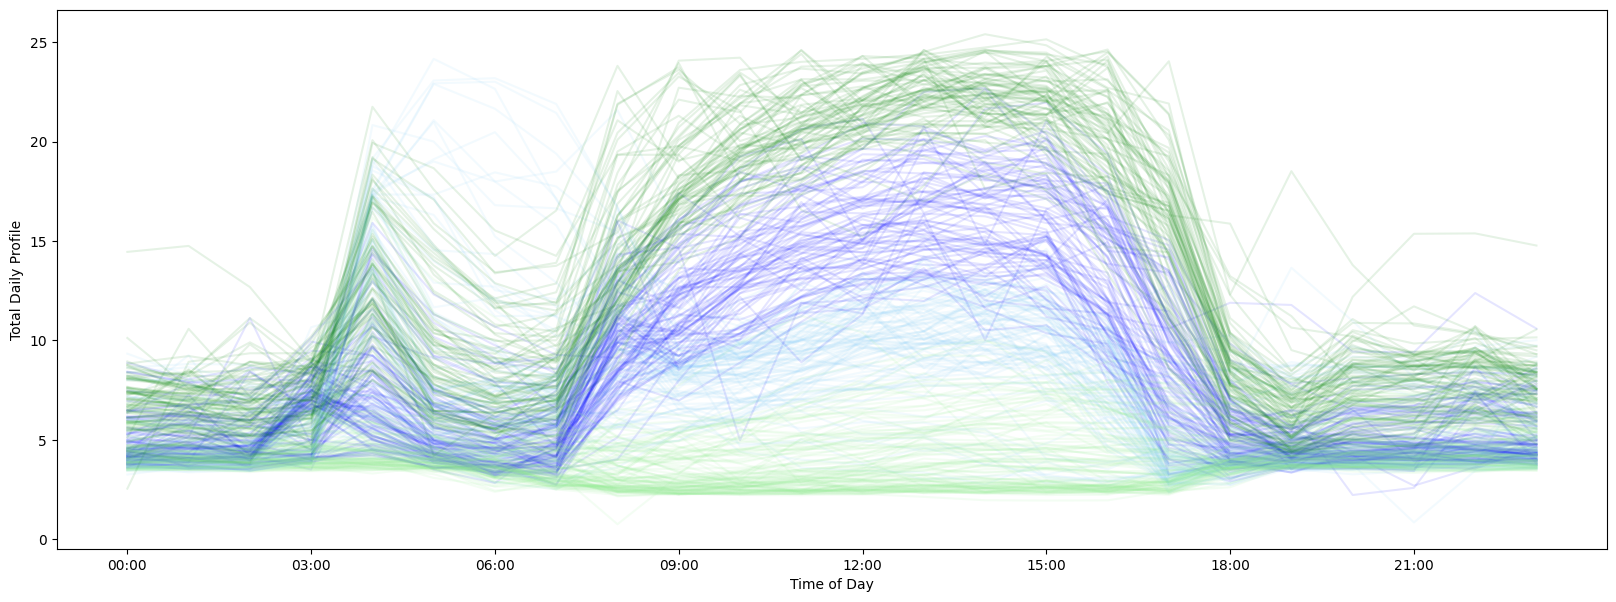

In [29]:
clusterlist = list(dailyclusters.columns.get_level_values(0).unique())
matplotlib.rcParams['figure.figsize'] = 20, 7

styles2 = ['LightSkyBlue', 'b','LightGreen', 'g','LightCoral','r','SandyBrown','Orange','Plum','Purple','Gold','b']
fig, ax = plt.subplots()
for col, style in zip(clusterlist, styles2):
    dailyclusters[col].plot(ax=ax, legend=False, style=style, alpha=0.1, xticks=np.arange(0, 86400, 10800))

ax.set_ylabel('Total Daily Profile')
ax.set_xlabel('Time of Day');

### Aggregate visualizations of the clusters


In [30]:
def timestampcombine(date,time):
    pydatetime = datetime.combine(date, time)
    return pydatetime

In [31]:
def ClusterUnstacker(df):
    df = df.unstack().reset_index()
    df['timestampstring'] = pd.to_datetime(df.Date.astype("str") + " " + df.level_2.astype("str"))
    #pd.to_datetime(df.Date  df.level_2) #map(timestampcombine, )
    df = df.dropna()
    return df

In [32]:
dailyclusters.unstack().reset_index().head()

ClusterNo2        Date   level_2      0
0           1  2015-01-01  00:00:00   3.96
1           1  2015-01-01  01:00:00   4.44
2           1  2015-01-01  02:00:00   4.82
3           1  2015-01-01  03:00:00   4.28
4           1  2015-01-01  04:00:00  18.79

In [33]:
dfclusterunstacked = ClusterUnstacker(dailyclusters)
dfclusterunstackedpivoted = pd.pivot_table(dfclusterunstacked, values=0, index='timestampstring', columns='ClusterNo2')

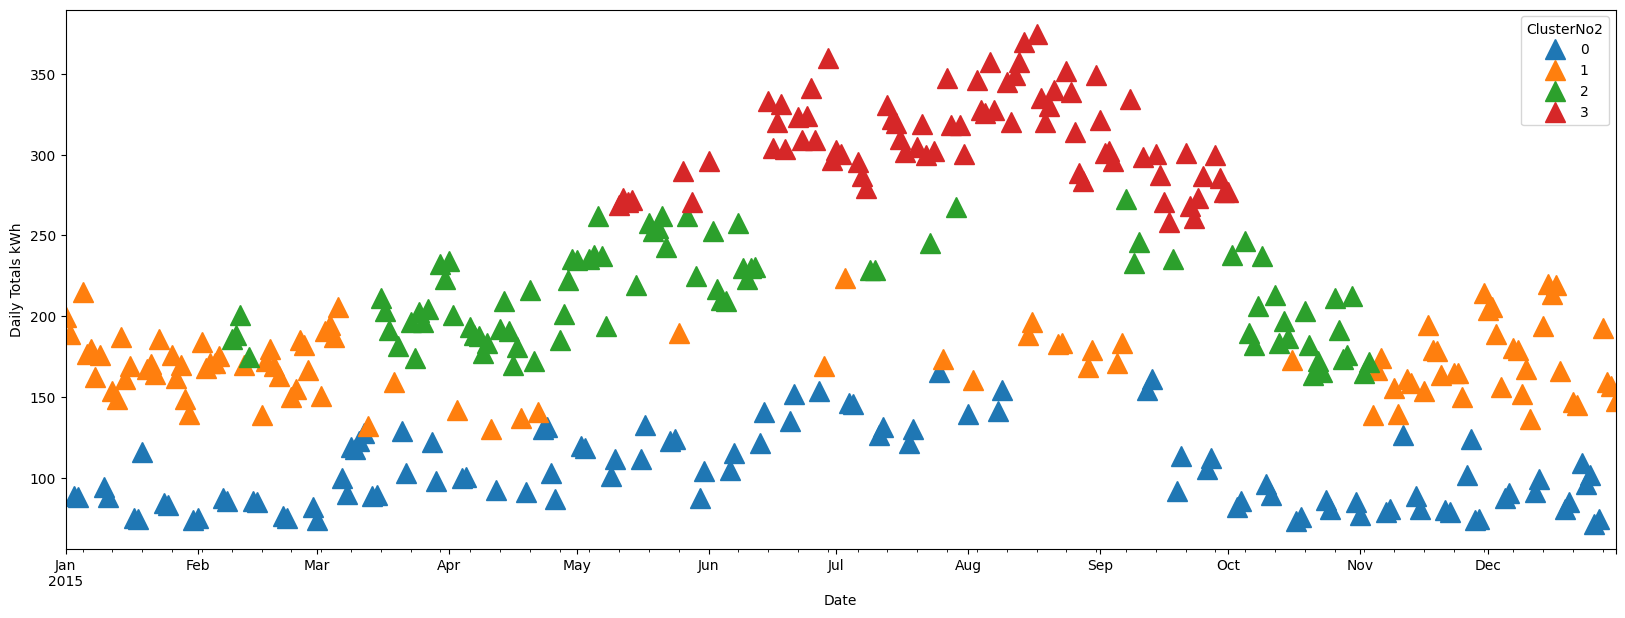

In [34]:
clusteravgplot = dfclusterunstackedpivoted.resample('D').sum().replace(0, np.nan).plot(style="^",markersize=15)
clusteravgplot.set_ylabel('Daily Totals kWh')
clusteravgplot.set_xlabel('Date');